# Project: Investigate a Dataset - TDP Movies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

#### Dataset Description 

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.


#### Columns:
   Imdb_id         -  -               original_title
   cast                -  -              popularity
   director          -  -             production_companies
   release_year  -  -            revenue
   budget_adj     -  -           revenue_adj


### Question(s) for Analysis

##### Which acrtor achieve revenue in their movies
##### who the director has top successfull movies
##### production companies revenue vs budget (loss or gain)


#### import statements for all of the packages we need to run the project

In [1]:
# import statements for all of the packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb
%matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 3.2MB/s eta 0:00:01   33% |██████████▉                     | 3.5MB 28.7MB/s eta 0:00:01    47% |███████████████                 | 4.9MB 28.9MB/s eta 0:00:01    60% |███████████████████▎            | 6.3MB 29.4MB/s eta 0:00:01    73% |███████████████████████▌        | 7.7MB 30.0MB/s eta 0:00:01    99% |███████████████████████████████▊| 10.4MB 28.3MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 2.7MB/s eta 0:00:01   24% |███████▊                        | 3.2MB 27.3MB/s eta 0:00:01    62% |████████████████████            | 8.3MB 26.5MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: pandas 0.23.3
    Uninstalling pandas-0.23.3:
      Successfully uninstalled pandas-0.23.3


<a id='wrangling'></a>
## Data Wrangling



### General Properties


Load data from  tmdb-movies.csv file

In [3]:

df= pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

Check the statistics for the data frame

In [4]:
df.describe()

TypeError: __init__() got an unexpected keyword argument 'max_rows'

                  id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
std     92130.136561      1.000185  3.091321e+07  1.170035e+08     31.381405   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.250000      0.207583  0.000000e+00  0.000000e+00     90.000000   
50%     20669.000000      0.383856  0.000000e+00  0.000000e+00     99.000000   
75%     75610.000000      0.713817  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean     217.389748      5.974922   2001.322658  1.755104e+07  5.136436e+07  
std      575.619058      0.935142     12.8129

Check the number of columns and rows for the dataframe

In [5]:
# Check the number of columns and rows for the dataframe
df.shape

(10866, 21)

Get the number of NA/Null values for each feature

In [6]:
# Get the number of NA/Null values for each feature
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


### Data Cleaning

#### Which data to be droped

For the questions about cast and director, it will be necessary to drop the rows has NA values.
Production_companies will droped in the question number 3.

#### which data to be filled
There is no data can be filled.

#### NA data to be ignored
The columns home page, tagline and keywords NA values will be ignored because it is not inculded in the calculations
 

In [7]:
''' Drop the cast and directors NA values from 
the dataframe to calculate the average revenue and top rated movies
'''
df.dropna(subset=['cast','director'], how='any',inplace=True)

Check features after drop the NA

In [8]:
# Check features after drop the NA
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10752 entries, 0 to 10865
Data columns (total 21 columns):
id                      10752 non-null int64
imdb_id                 10746 non-null object
popularity              10752 non-null float64
budget                  10752 non-null int64
revenue                 10752 non-null int64
original_title          10752 non-null object
cast                    10752 non-null object
homepage                2898 non-null object
director                10752 non-null object
tagline                 8007 non-null object
keywords                9312 non-null object
overview                10749 non-null object
runtime                 10752 non-null int64
genres                  10732 non-null object
production_companies    9780 non-null object
release_date            10752 non-null object
vote_count              10752 non-null int64
vote_average            10752 non-null float64
release_year            10752 non-null int64
budget_adj              1

In [9]:
df.isnull().sum()

id                         0
imdb_id                    6
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                       0
homepage                7854
director                   0
tagline                 2745
keywords                1440
overview                   3
runtime                    0
genres                    20
production_companies     972
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Add new column Main Actor by applying lamda function to split the cast cell by | and get the first one

In [10]:
# Add column Main Actor/Actress by applying lamda function to split the cast cell by | and get the first one
df['MainActor']= df['cast'].apply(lambda x: x.split('|')[0])
# another way to get the Main actor df['MainActor']=[ act.split('|')[0] for act in df['cast'] ]


In [11]:
df.head()

TypeError: __init__() got an unexpected keyword argument 'max_rows'

       id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (top acrtors achieved revenue in their movies)

group by Main actor and sum the revenue per actor.

In [12]:
#group by Main actor and sum the revenue per actor.
top_actors = df.groupby('MainActor')['revenue'].sum().sort_values(ascending=False)

Get Top 5 actors

In [13]:
top_actors =top_actors.head(5)

Present the 5 actors with top revenues

Text(0,0.5,'Revenue')

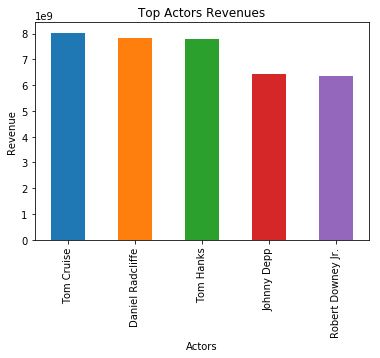

In [14]:
top_actors.plot(kind='bar',title="Top Actors Revenues", label='Actor');
plt.xlabel("Actors")
plt.ylabel('Revenue')


### Research Question 2 (who the director has top rated movies)

group by directors to get the average of the vote average column for all movies directed by them.

In [15]:
# group by directors to get the average of the vote average column for all movies directed by them.

top_five_directors=df.groupby('director')['vote_average'].mean().sort_values(ascending=False).head(5)

Present the directors have top rated movies

Text(0,0.5,'Total Average Rate')

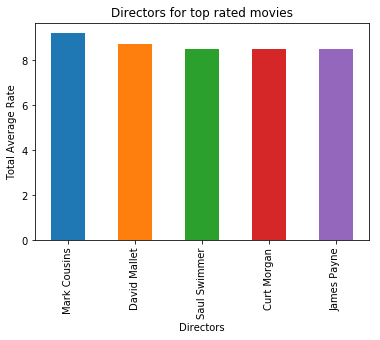

In [16]:
top_five_directors.plot(kind='bar',title="Directors for top rated movies", label='Director');
plt.xlabel("Directors")
plt.ylabel('Total Average Rate')


### Extra Step
Comparing between the actors and directors for the top rated movies

In [17]:
top_five_actors=df.groupby('MainActor')['vote_average'].mean().sort_values(ascending=False).head(5)

the below chart view the relation between top rated movies for actors vs top rated movies for directors, if the blue and orange are the same hight , then both director and actor the cause to succuss this movie

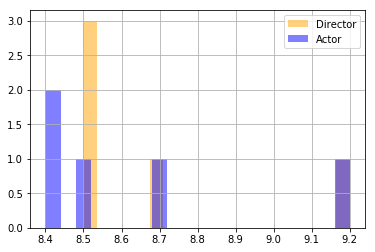

In [18]:
top_five_directors.hist(alpha=0.5, bins=20, color='orange' ,label='Director');
top_five_actors.hist(alpha=0.5, bins=20, color='blue' ,label='Actor');
plt.legend();


### Question 3 (production companies revenue vs budget (loss or gain))

this question show the relation between budjet and revenue for production companies, is the companies gaining profit or lose

In [19]:
def fillNAWithValue(df,colName,ValueToFill):
    '''
    This function to fill the Na values  in column
    with specific word
    args: 
        df : the dataframe
        colName: the column name will be filled
        ValueToFill: the value will be used to fill the NA
    '''
    df[colName].fillna(ValueToFill, inplace=True)
    

fill the NA in production companies to be Other companies

In [20]:
#Fill NA with Other word
fillNAWithValue(df,'production_companies','Other')

In [23]:
companies_revenue = df.groupby('production_companies')[['production_companies','revenue_adj','budget_adj']].tail(5)


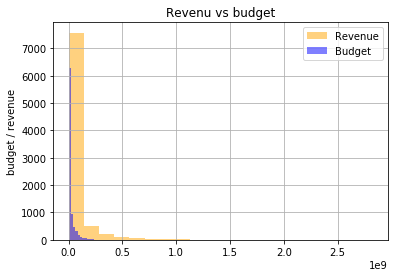

In [22]:
companies_revenue['revenue_adj'].hist(alpha=0.5, bins=20, color='orange' ,label='Revenue');
companies_revenue['budget_adj'].hist(alpha=0.5, bins=20, color='blue' ,label='Budget');
plt.title('Revenu vs budget');
plt.ylabel('budget / revenue');
plt.legend();


Revenue vs budget are skeweed to the right, that means few companies are having most of the profits from the movies production

<a id='conclusions'></a>
## Conclusions

Last, after reviewing the movies and the revenue, we got the below:

1- popular actor and good director may be great factor to increase the revenue and get numerous positive ratings.
2- few companies in the movies prodcution gaining most of the revenue, but they have huge budgets.










## Submitting your Project 



In [24]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0